In [16]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 30,5
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import import_ipynb

In [17]:
import LevelsCreater as lc

importing Jupyter notebook from LevelsCreater.ipynb


In [18]:
a='Data'
b='sales_train_validation.csv'
sale=pd.read_csv(os.path.join(a,b))

In [82]:
levels = lc.LevelsCreater()
level3 = levels.level_3(sale)

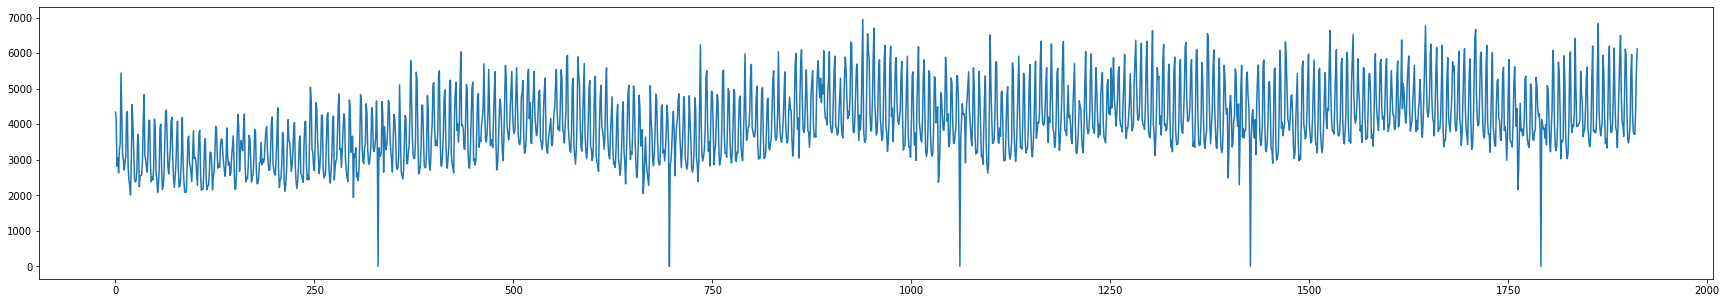

In [83]:
ts1 = level3.iloc[0,1:]
plt.plot(list(range(0,level3.iloc[0,:].shape[0])),level3.iloc[0,:]) 
plt.show()


In [84]:
lag=28
y = ts1.iloc[lag:ts1.shape[0]]
X = ts1.iloc[0:y.shape[0]].values.reshape(-1,1)
t = np.arange(lag,ts1.shape[0])
lm = LinearRegression()
y = y.values.reshape(-1,1)

In [85]:
timeseries = pd.DataFrame(list(zip(X,t)))
sinx = np.sin(2*np.pi*t/lag)
cosx = np.cos(2*np.pi*t/lag)
p= pd.DataFrame(list(zip(sinx,cosx)))
X_predictors = pd.concat([timeseries,p],axis=1)

In [86]:
lm.fit(X_predictors,y)
err = (lm.predict(X_predictors)-y)
y_pred = lm.predict(X_predictors)

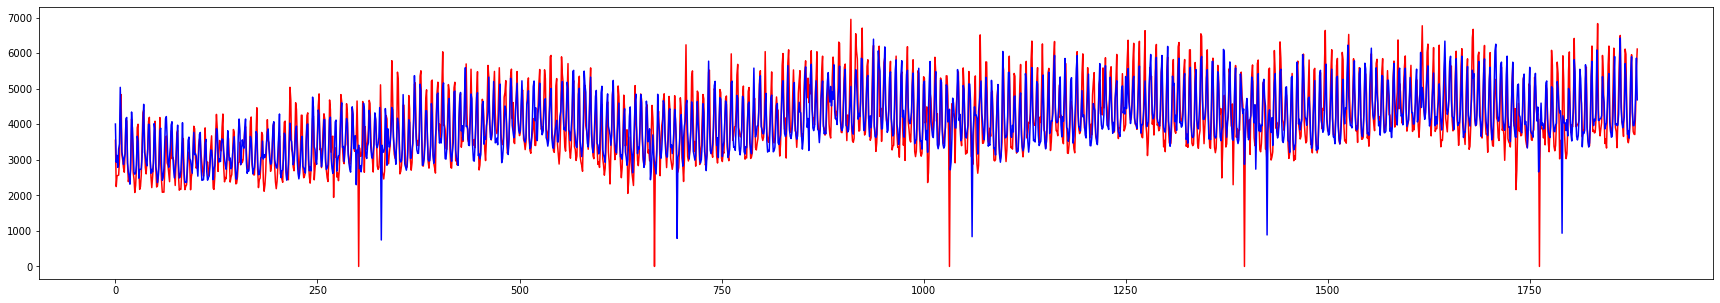

In [87]:
plt.plot(y,color='r')
plt.plot(y_pred,color='b')
plt.show()

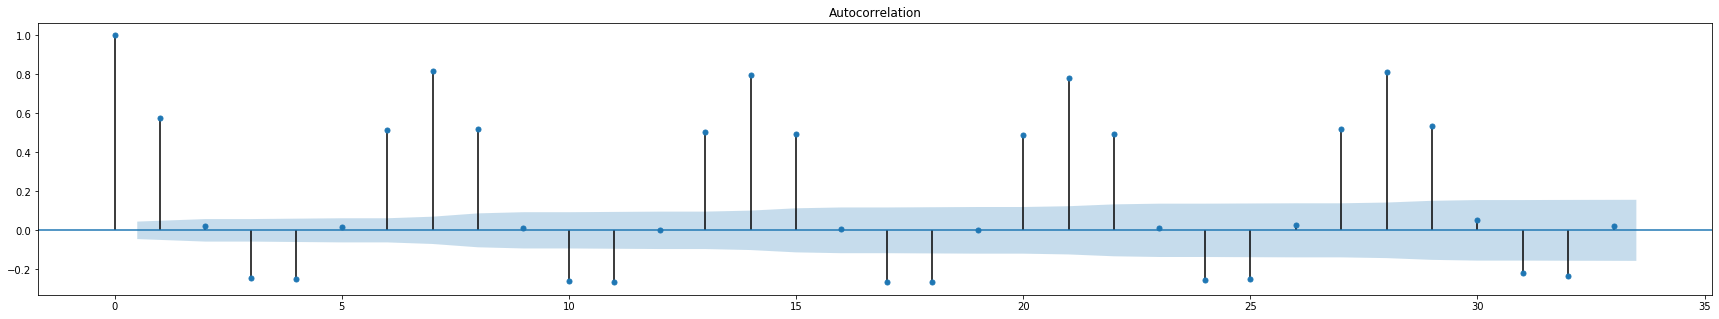

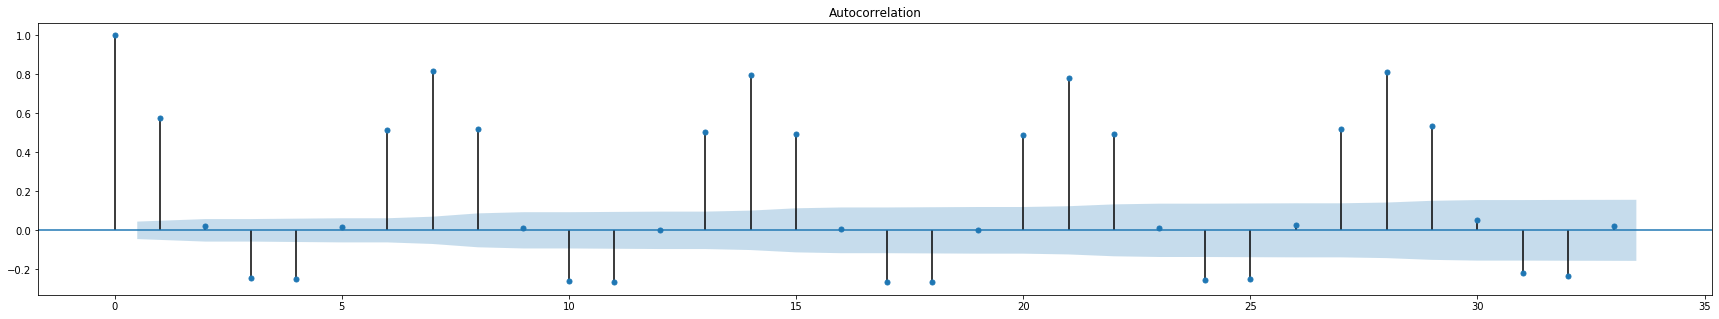

In [57]:
mse = np.mean(np.square(err))
plot_acf(err)